# Análise de Risco de Crédito - Nubank

## **Introdução**  

A inadimplência bancária representa um desafio significativo para instituições financeiras, impactando diretamente a concessão de crédito e a sustentabilidade do negócio. A capacidade de prever se um novo cliente será inadimplente permite que o banco adote estratégias mais eficazes para mitigar riscos financeiros, otimizar suas ofertas de crédito e garantir maior estabilidade econômica.  

O presente projeto tem como objetivo desenvolver modelos de machine learning capazes de prever a probabilidade de um cliente tornar-se inadimplente com base em variáveis relacionadas ao seu histórico financeiro, comportamento e características socioeconômicas. A construção desses modelos permitirá não apenas a identificação de padrões que influenciam o risco de inadimplência, mas também a elaboração de políticas mais assertivas na concessão de crédito.  

Os dados utilizados neste estudo são provenientes de uma competição organizada por uma fintech inovadora, que busca revelar talentos na área de ciência de dados e explorar abordagens avançadas para a previsão de inadimplência.  

## **Objetivos**  

1. **Identificar as principais variáveis associadas ao risco de inadimplência**, analisando fatores como histórico de crédito, comportamento de solicitação e outros indicadores relevantes.  
2. **Desenvolver um modelo preditivo capaz de classificar novos clientes como adimplentes ou inadimplentes**, utilizando técnicas avançadas de aprendizado de máquina.  
3. **Calcular a probabilidade de inadimplência para cada cliente**, permitindo que o banco adote estratégias diferenciadas para perfis de maior risco.  

## **Análise dos Dados**

Esta seção fornece uma visão detalhada da estrutura e do significado dos dados que estão sendo analisados.

### **Dicionário de Variáveis**

- **`ids`**  
  - Identificação única do cliente.

- **`target_default`**  
  - Variável-alvo, indica se o cliente foi inadimplente (`True`) ou não (`False`).

- **`score_1` a `score_6`**  
  - **Descrição:** Notas de bureau de crédito.  
  - **Finalidade:** Utilizadas para avaliar a confiabilidade do comprador.

- **`risk_rate`**  
  - Pontuação de risco do cliente com base no histórico de crédito.

- **`last_amount_borrowed`**  
  - Valor total do último empréstimo/crédito concedido ao cliente.

- **`last_borrowed_in_months`**  
  - Quantidade de meses desde o último empréstimo.

- **`credit_limit`**  
  - Limite de crédito disponível para o cliente.

- **`income`**  
  - Renda declarada do cliente.

- **`facebook_profile`**  
  - Indica se o cliente possui perfil no Facebook (`True`/`False`).

- **`application_time_applied`**  
  - Horário da solicitação de crédito.

- **`application_time_in_funnel`**  
  - Posição do cliente no funil de vendas no momento da aplicação.

- **`email`**  
  - Provedor de e-mail utilizado pelo cliente.

- **`external_data_provider_fraud_score`**  
  - Pontuação de risco de fraude atribuída por um provedor externo.

- **`lat_lon`**  
  - Localização do cliente (latitude e longitude).

- **`marketing_channel`**  
  - Canal pelo qual o cliente fez a aplicação (exemplo: orgânico, pago, parceiro).

- **`profile_phone_number`**  
  - Número de telefone informado pelo cliente.

- **`reported_income`**  
  - Valor da renda informado pelo cliente.

- **`shipping_state`**  
  - Estado de envio do cartão.

- **`shipping_zip_code`**  
  - Código postal para envio do cartão.

- **`user_agent`**  
  - Informações sobre o dispositivo utilizado na aplicação (PC, celular, sistema operacional, navegador).

- **`target_fraud`**  
  - Variável-alvo indicando se o cliente foi identificado como fraudador.

- **`external_data_provider_credit_checks_last_2_year`**  
  - Número de consultas ao histórico de crédito do cliente nos últimos dois anos.

- **`external_data_provider_credit_checks_last_month`**  
  - Número de consultas ao histórico de crédito no último mês.

- **`external_data_provider_credit_checks_last_year`**  
  - Número de consultas ao histórico de crédito no último ano.

- **`external_data_provider_email_seen_before`**  
  - Indica se o e-mail já foi visto anteriormente em bases externas.

- **`external_data_provider_first_name`**  
  - Primeiro nome do cliente de acordo com provedores externos.

- **`n_accounts`**  
  - Número total de contas bancárias associadas ao cliente.

- **`n_bankruptcies`**  
  - Número de falências registradas no nome do cliente.

- **`n_issues`**  
  - Número de problemas financeiros registrados no histórico do cliente.

- **`ok_since`**  
  - Tempo desde a qual o cliente está em situação financeira regularizada.

### **Variáveis Anonimizadas**

- **`channel`**, **`job_name`**, **`profile_tags`**, **`real_state`**, **`reason`**, **`state`**, **`zip`**  
  - Variáveis anonimizadas que podem representar dados sensíveis do cliente, como ocupação, histórico de crédito e localização.
  - Embora anonimizadas, essas informações possuem natureza categórica, as quais ainda podem ser usadas para a classificação do cliente.

In [62]:
# Bibliotecas para manipulação de dados
import pandas as pd # Para manipulação de dataframes
import re # Para manipulação de expressões regulares
import ast  # Para converter a string de dicionário em um objeto Python
from collections import Counter  # Para contar as ocorrências de valores em uma lista
import numpy as np # Para manipulação de arrays

# Bibliotecas para visualização de dados
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para manipulação de user agents
from user_agents import parse 

# Bibliotecas para testes estatísticos 
import scipy.stats as stats


# Configurações para exibição de dados

# Ajustes de configuração
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")


In [27]:
#Importando os dados de treino
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

In [28]:
# Exibindo as primeiras linhas do dataset
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Inicialmente, algumas observações podem ser feitas em relação às variáveis disponíveis:

- **`score_1`** e **`score_2`** estão anonimizadas, mas, ainda podem ser relevantes para o estudo e devem ser analisadas com atenção.
- A variável **`application_time_applied`** é do tipo _data_ e precisa ser tratada corretamente para ser utilizada no trabalho, garantindo a correta manipulação temporal.
- A variável **`lat_lon`** contém coordenadas geográficas (latitude e longitude), o que sugere que ela pode ser usada para análises espaciais ou geográficas.
- As variáveis **`profile_tags`** e **`user_agent`** são compostas, ou seja, contêm múltiplas informações. Será necessário extrair dados específicos dessas variáveis para análise, como por exemplo, a identificação de dispositivos ou categorias associadas ao perfil.



In [29]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

Entradas: 45000
Colunas: 43


In [30]:
# Extrair o tipo das variáveis
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Vamos agora extrair as variáveis presentes em user_agent e profile_tags

In [31]:
# Função para extrair as informações do user_agent
def extract_user_agent_info(user_agent):
    # Verifica se a entrada é uma string válida
    if not isinstance(user_agent, str):
        return [None] * 9  # Retorna uma lista de None caso a entrada não seja uma string

    # Aplica o parser para extrair as informações do userAgent
    ua = parse(user_agent)

    # Extraindo as informações com base no parser
    device_brand = ua.device.brand  # Marca do dispositivo
    device_model = ua.device.model  # Modelo do dispositivo
    os_family = ua.os.family  # Família do sistema operacional
    os_version = ua.os.version_string  # Versão do sistema operacional
    user_agent_family = ua.browser.family  # Família do user agent (navegador)
    browser_version = ua.browser.version_string  # Versão do navegador

    # Verificando se é um dispositivo móvel
    is_mobile = ua.is_mobile

    # Determinando o tipo do dispositivo com base em `ua.device`
    device_type = "Mobile" if ua.is_mobile else "Tablet" if ua.is_tablet else "Desktop"

    # Extraindo a versão do WebKit
    webkit_version = None
    if 'AppleWebKit' in user_agent:
        match_webkit = re.search(r"AppleWebKit/([\d\.]+)", user_agent)
        if match_webkit:
            webkit_version = match_webkit.group(1)

    # Verificando se está rodando em modo WebView
    is_webview = "; wv" in user_agent or "Version/" in user_agent

    return device_brand, device_model, os_family, os_version, user_agent_family, browser_version, device_type, is_mobile, webkit_version, is_webview

# Exemplo de uso: Aplicando a função ao DataFrame
df[['device_brand', 'device_model', 'os_family', 'os_version', 'user_agent_family', 
        'browser_version', 'device_type', 'is_mobile', 'webkit_version', 'is_webview']] = \
    df['user_agent'].apply(lambda x: pd.Series(extract_user_agent_info(x)))

# Exibindo o DataFrame com as novas colunas
df.head()


,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,device_brand,device_model,os_family,os_version,user_agent_family,browser_version,device_type,is_mobile,webkit_version,is_webview
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,Sony,SGP771,Android,6.0.1,Chrome Mobile WebView,52.0.2743,Mobile,True,537.36,True
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN,Samsung,SM-T550,Android,5.0.2,Samsung Internet,3.3,Tablet,False,537.36,False
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,Sony,SGP771,Android,6.0.1,Chrome Mobile WebView,52.0.2743,Mobile,True,537.36,True
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN,HTC,One X10,Android,6.0,Chrome Mobile WebView,61.0.3163,Mobile,True,537.36,True
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:

## Explicação das Colunas Extraídas do `user_agent`

1. **device_brand**
   - **Descrição**: Representa a marca do dispositivo utilizado. Exemplo: Samsung, Apple, etc.
   - **Exemplo**: "Apple", "Samsung", "Google"

2. **device_model**
   - **Descrição**: Refere-se ao modelo específico do dispositivo. Pode incluir informações como o número do modelo ou a série do dispositivo.
   - **Exemplo**: "iPhone 12", "Galaxy S21", "Pixel 5"

3. **os_family**
   - **Descrição**: Indica a família do sistema operacional utilizado no dispositivo, como Android, iOS, Windows, etc.
   - **Exemplo**: "Android", "iOS", "Windows NT"

4. **os_version**
   - **Descrição**: A versão do sistema operacional em uso no dispositivo.
   - **Exemplo**: "10", "12.1.0", "5.1.1"

5. **user_agent_family**
   - **Descrição**: Refere-se à família do navegador ou cliente utilizado para acessar o site. Pode ser o nome do navegador principal.
   - **Exemplo**: "Chrome", "Safari", "Firefox"

6. **browser_version**
   - **Descrição**: A versão específica do navegador utilizado.
   - **Exemplo**: "92.0.4515.159", "14.1.2", "89.0.4389.82"

7. **device_type**
   - **Descrição**: Define o tipo de dispositivo, que pode ser "Mobile", "Tablet" ou "Desktop", dependendo das características detectadas.
   - **Exemplo**: "Mobile", "Tablet", "Desktop"

8. **is_mobile**
   - **Descrição**: Um valor booleano (`True` ou `False`) indicando se o dispositivo é móvel (smartphone ou dispositivo portátil) ou não.
   - **Exemplo**: `True` (se o dispositivo for um smartphone), `False` (se for um desktop ou tablet)

9. **webkit_version**
   - **Descrição**: A versão do motor de renderização WebKit, geralmente utilizado em navegadores como o Safari.
   - **Exemplo**: "537.36", "601.1.46"

10. **is_webview**
    - **Descrição**: Um valor booleano (`True` ou `False`) indicando se o navegador está operando em um modo WebView. Um WebView é uma interface para exibir conteúdo web dentro de aplicativos móveis.
    - **Exemplo**: `True` (se o navegador está em WebView), `False` (se não está)


Para profile_tags, vamos identificar a quantidade de tags únicas presentes no dataset

In [32]:

# Função para extrair as tags da coluna 'profile_tags'
def extract_tags(tag_str):
    try:
        # Converte string em dicionário e retorna a lista de tags
        tag_dict = ast.literal_eval(tag_str)
        return tag_dict.get('tags', [])
    except (ValueError, SyntaxError):
        return []  # Retorna lista vazia se houver erro

# Aplicando a função na coluna
df['parsed_tags'] = df['profile_tags'].apply(extract_tags)

# Criando um conjunto com todas as tags únicas
unique_tags = set(tag for tags in df['parsed_tags'] for tag in tags)
print(unique_tags)


{'n15', 'pro+aty', 'n7', 'n4', 'b19', 'n18', 'aty', 'nim', 'n5', 'n14', 'dfa', 'n13', 'n16', 'c1', 'n9', 'n8', 'n12', 'n11', 'n19', 'n2', 'n6', 'c55', 'n3', 'n1', 'n0', 'a15', 'n17', 'n10', 'da'}


Como possuímos menos informações de o que exatamente representa essa coluna, optarei por manter a informação de apenas as 10 tags mais frequentes a fim de não criar colunas em demasia e tornar o dataset esparço.

In [33]:
# Criar um contador de frequência das tags no conjunto de treino
tag_counts = Counter(tag for tags in df['parsed_tags'] for tag in tags)

# Selecionar as 10 tags mais frequentes
top_tags = [tag for tag, _ in tag_counts.most_common(10)]

# Criar colunas binárias apenas para as tags mais frequentes
for tag in top_tags:
    df[f'tag_{tag}'] = df['parsed_tags'].apply(lambda x: 1 if tag in x else 0)

# Criar uma coluna para identificar se há tags desconhecidas
df['tag_outros'] = df['parsed_tags'].apply(lambda x: any(tag not in top_tags for tag in x))

# Removendo as colunas originais que foram expandidas
df.drop(columns=['parsed_tags', 'user_agent', 'profile_tags'], inplace=True)

df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,target_fraud,device_brand,device_model,os_family,os_version,user_agent_family,browser_version,device_type,is_mobile,webkit_version,is_webview,tag_a15,tag_b19,tag_da,tag_pro+aty,tag_dfa,tag_aty,tag_nim,tag_c55,tag_n10,tag_n16,tag_outros
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,NaN,Sony,SGP771,Android,6.0.1,Chrome Mobile WebView,52.0.2743,Mobile,True,537.36,True,0,0,0,0,0,0,0,0,0,0,True
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,NaN,Samsung,SM-T550,Android,5.0.2,Samsung Internet,3.3,Tablet,False,537.36,False,0,0,0,0,0,0,1,0,0,0,True
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,NaN,Sony,SGP771,Android,6.0.1,Chrome Mobile WebView,52.0.2743,Mobile,True,537.36,True,0,0,1,0,0,0,1,0,0,0,True
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,NaN,HTC,One X10,Android,6.0,Chrome Mobile WebView,61.0.3163,Mobile,True,537.36,True,0,0,0,0,0,0,0,0,0,0,True
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,NaN,Google

Avaliaremos agora a quantidade de valores ausentes presentes no dataframe

In [34]:
# Porcentagem de itens nulos
(df.isnull().sum()/df.shape[0] * 100).round(2)

ids                                                  0.00
target_default                                       7.24
score_1                                              1.25
score_2                                              1.25
score_3                                              1.25
score_4                                              0.00
score_5                                              0.00
score_6                                              0.00
risk_rate                                            1.25
last_amount_borrowed                                66.57
last_borrowed_in_months                             66.57
credit_limit                                        30.67
reason                                               1.26
income                                               1.25
facebook_profile                                     9.91
state                                                1.25
zip                                                  1.25
channel       

<Axes: >

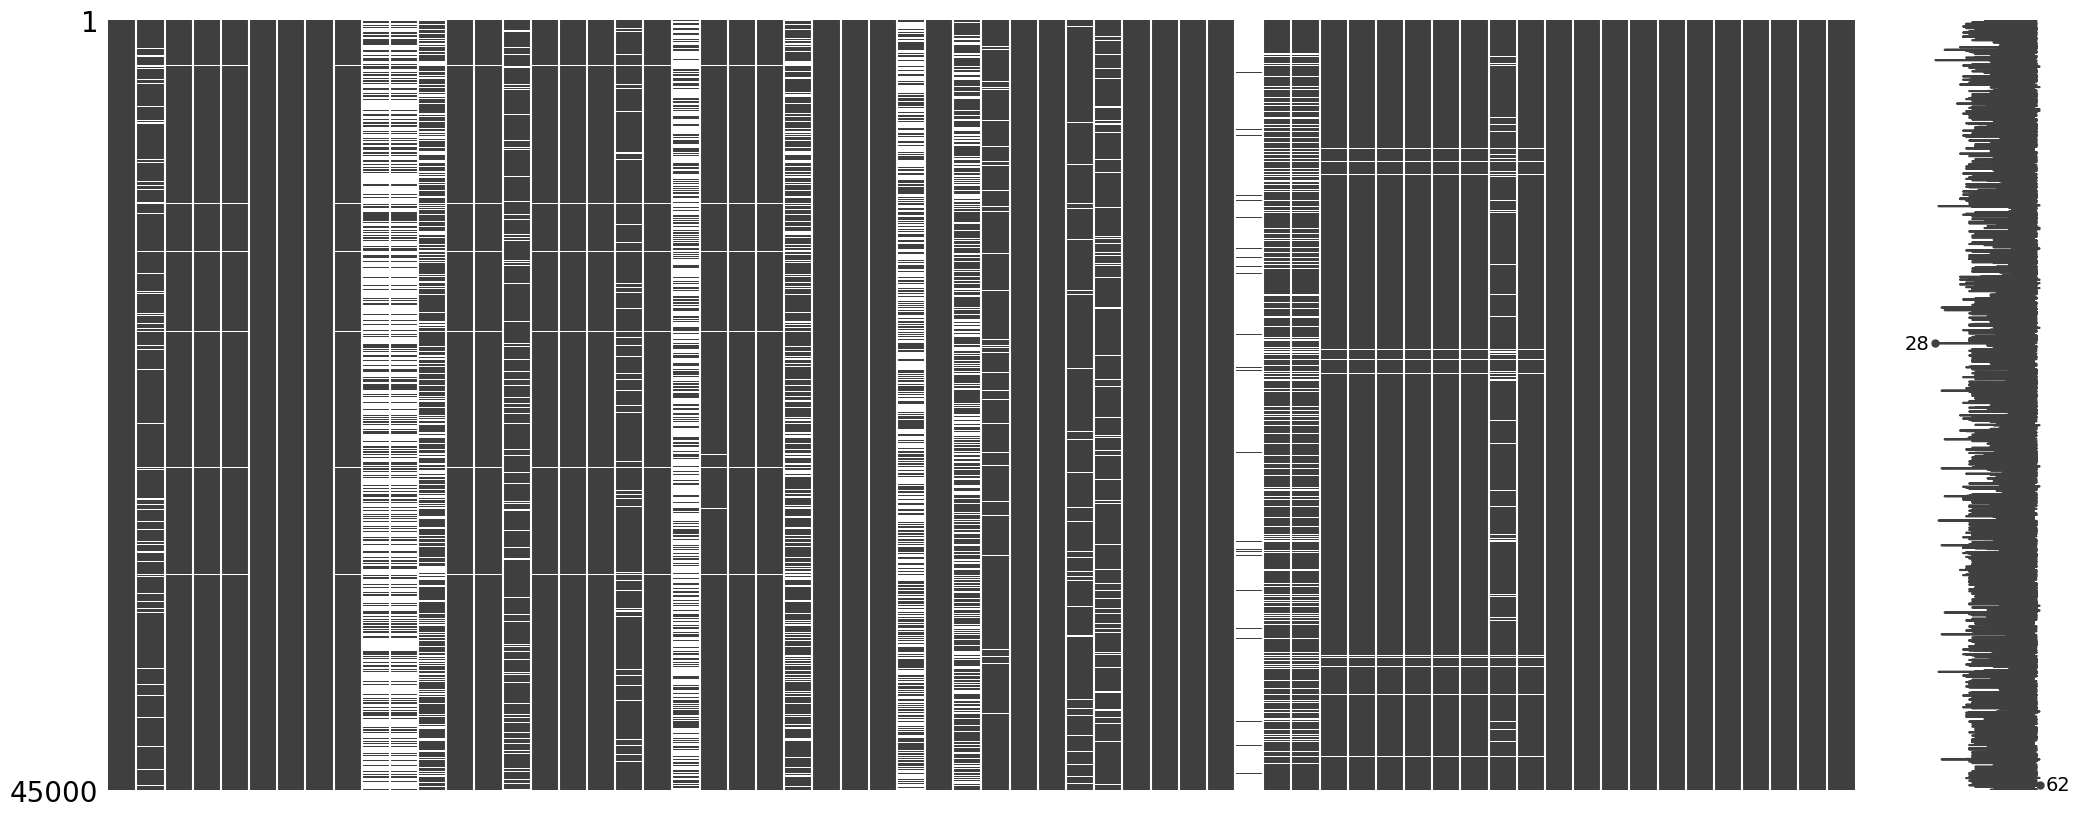

In [35]:
missingno.matrix(df)

Conseguimos notar que há nulos presentes na nossa variável resposta **``target_default``**.
Desse modo, precisamos remover essas linhas para continuarmos com a análise.

In [36]:
df.dropna(subset=['target_default'], inplace=True)

In [105]:
# Função para converter os tipos de dados corretamente
def convert_columns(df):
    # Converter colunas categóricas
    categorical_cols = [
        "target_default", "score_1", "score_2", "reason", "state", "zip", "channel", "job_name",
        "real_state", "email", "external_data_provider_first_name", "marketing_channel", 
        "shipping_state", "shipping_zip_code", "target_fraud", "device_brand", "device_model",
        "os_family", "os_version", "user_agent_family", "browser_version", "device_type",
        "webkit_version", "tag_a15", "tag_b19", "tag_da", "tag_pro+aty",
        "tag_dfa", "tag_aty", "tag_nim", "tag_c55", "tag_n10", "tag_n16"
    ]
    df[categorical_cols] = df[categorical_cols].astype("category")

    # Converter colunas binárias para booleano
    binary_cols = ["facebook_profile", "tag_outros", "is_mobile", "is_webview"]
    df[binary_cols] = df[binary_cols].astype("bool")

    # Converter colunas numéricas para float
    numeric_cols = [
        "score_3", "score_4", "score_5", "score_6", "risk_rate", "last_amount_borrowed",
        "last_borrowed_in_months", "credit_limit", "income", "ok_since", "n_bankruptcies",
        "n_defaulted_loans", "n_accounts", "n_issues", "application_time_in_funnel",
        "external_data_provider_credit_checks_last_2_year", "external_data_provider_credit_checks_last_month",
        "external_data_provider_credit_checks_last_year", "external_data_provider_email_seen_before",
        "external_data_provider_fraud_score", "reported_income"
    ]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

    # Converter para timedelta
    df["application_time_applied"] = pd.to_timedelta(df["application_time_applied"], errors="coerce")

    # Transformar timedelta em horas decimais (float)
    df["application_time_applied"] = df["application_time_applied"].dt.total_seconds() / 3600

    # Converter colunas geográficas para string (ou tupla, dependendo do formato original)
    df["lat_lon"] = df["lat_lon"].astype("string")

    # Converter colunas de texto para string
    text_cols = ["ids", "profile_phone_number"]
    df[text_cols] = df[text_cols].astype("string")

    return df

df = convert_columns(df)


In [106]:
categorical_columns = df.select_dtypes(include=["category"]).columns
print(categorical_columns)
print("\n","*"*50,"\n")
bool_columns = df.select_dtypes(include=["bool"]).columns
print(bool_columns)
print("\n","*"*50,"\n")
numeric_columns = df.select_dtypes(include=["number"]).columns
print(numeric_columns)



Index(['target_default', 'score_1', 'score_2', 'reason', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'email',
       'external_data_provider_first_name', 'marketing_channel',
       'shipping_state', 'shipping_zip_code', 'target_fraud', 'device_brand',
       'device_model', 'os_family', 'os_version', 'user_agent_family',
       'browser_version', 'device_type', 'webkit_version', 'tag_a15',
       'tag_b19', 'tag_da', 'tag_pro+aty', 'tag_dfa', 'tag_aty', 'tag_nim',
       'tag_c55', 'tag_n10', 'tag_n16'],
      dtype='object')

 ************************************************** 

Index(['facebook_profile', 'is_mobile', 'is_webview', 'tag_outros'], dtype='object')

 ************************************************** 

Index(['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit',
       'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues', 'application_time

Podemos dropar as colunas que não possuem informação como a variável 'ids', 'profile_phone_number', 'external_data_provider_first_name' e 'lat_lon'

## ANÁLISE EXPLORATÓRIA (EDA) UNIVARIADA E BIVARIADA

### Variáveis categóricas

Precisamos compreender como as nossas variáveis se distribuem e quais delas possuem potencial para entrar no nosso modelo de predição de risco.

Variáveis uniformes/constantes ou com cardinalidade muito alta devem ser excluídas pois suas categorias potencialmente não estarão presentes nos dados de treino, o que prejudica sua generalização.

#### target_default

In [40]:
df.target_default.value_counts(normalize=True)

target_default
False    0.840421
True     0.159579
Name: proportion, dtype: float64

Conseguimos notar, olhando para nossa variável dependente que apenas 16% dos usuários estão classificados como inadimplentes. Dessa forma, lidamos com dados desbalanceados.

In [75]:
# Função para calcular a dependência entre variáveis categóricas
def category_statistics(df, column, target="target_default"):
    # Calculando frequências absolutas e relativas
    overall_counts = df[column].value_counts()
    overall_perc = df[column].value_counts(normalize=True) * 100

    default_counts = df.loc[df[target] == True, column].value_counts()
    default_perc = df.loc[df[target] == True, column].value_counts(normalize=True) * 100

    df_summary = pd.DataFrame({
        "Categoria": overall_counts.index,
        "Qtd_Total": overall_counts.values,
        "Freq_Total(%)": overall_perc.values,
        "Qtd_Default": default_counts.reindex(overall_counts.index, fill_value=0).values,
        "Freq_Default(%)": default_perc.reindex(overall_counts.index, fill_value=0).values
    })

    # Criando a tabela de contingência
    contingency_table = pd.crosstab(df[column], df[target])

    # Verificando se todas as células esperadas são maiores que 5
    _, _, _, expected = stats.chi2_contingency(contingency_table)
    min_expected = expected.min()

    if contingency_table.shape == (2, 2):
        # Para tabelas 2x2, usar Fisher
        _, p_value = stats.fisher_exact(contingency_table)
        test_used = "Teste Exato de Fisher"
        effect_size = phi_coefficient(contingency_table)
    elif min_expected < 5:
        # Se houver células esperadas < 5 em tabelas maiores, usar Qui-quadrado com correção de Yates
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table, correction=True)
        test_used = "Qui-quadrado com Correção de Yates"
        effect_size = phi_coefficient(contingency_table)

    else:
        # Caso contrário, usar Qui-quadrado normal
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table, correction=False)
        test_used = "Teste Qui-quadrado"
        effect_size = cramers_v(contingency_table)

    return df_summary, test_used, p_value, effect_size


def phi_coefficient(contingency_table):
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / n)


def cramers_v(contingency_table):
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

def plot_categorical_counts(df, col):
    plt.figure(figsize=(10, 5))
    top_categories = df[col].value_counts().index[:10]  # Seleciona as 10 categorias mais frequentes
    sns.countplot(y=df[col], order=top_categories, palette="viridis")
    plt.title(f"Distribuição de Categorias - {col}")
    plt.xlabel("Contagem")
    plt.ylabel(col)
    plt.show()

def aplicar_resumo(variavel):
    # Aplicando a função para a variável score_1
    df_summary, test_used, p_value, effect_size = category_statistics(df, variavel)

    # Exibir o resultado
    display(df_summary.head(10))

    print(f"Teste Utilizado: {test_used}")
    print(f"p-valor: {p_value:.4f}")
    print(f"Tamanho do Efeito: {effect_size:.4f}")

    # Chamar a função passando o dataframe e a coluna categórica
    plot_categorical_counts(df, variavel)


### Função para Calcular a Dependência entre Variáveis Categóricas

A função `category_statistics` realiza uma análise estatística para medir a dependência entre uma variável categórica e o target, utilizando testes apropriados de acordo com as características da tabela de contingência.

#### Descrição

A função calcula as frequências absolutas e relativas de uma variável categórica (`column`) em relação ao target (`target_default`, por padrão). Além disso, gera uma tabela de contingência para analisar a associação entre as categorias da variável e o target. A função então aplica um dos seguintes testes estatísticos, dependendo das características da tabela de contingência:

1. **Teste Exato de Fisher**: Para tabelas 2x2, quando o número de observações esperadas em qualquer célula é menor que 5.
2. **Qui-quadrado com Correção de Yates**: Para tabelas maiores, quando o número de observações esperadas em qualquer célula é inferior a 5.
3. **Teste Qui-quadrado**: Para tabelas maiores, quando todas as células têm pelo menos 5 observações esperadas.

Além dos testes, a função também calcula o tamanho do efeito, usando os coeficientes de Phi ou de Cramér, dependendo do tipo de teste.

#### Parâmetros

- `df`: DataFrame contendo os dados.
- `column`: Nome da coluna categórica cujas categorias serão analisadas.
- `target`: Nome da coluna alvo (default é `"target_default"`).

#### Retorno

A função retorna:
- `df_summary`: Um DataFrame contendo as estatísticas de frequência total e para o target.
- `test_used`: O teste estatístico utilizado para a análise.
- `p_value`: O valor p do teste utilizado.
- `effect_size`: O tamanho do efeito, medido pelo coeficiente de Phi ou de Cramér.

#### Exemplos de Tamanho de Efeito

Usando o coeficiente de Cramér, o tamanho do efeito pode ser categorizado da seguinte forma:
- **0.1**: Efeito pequeno
- **0.3**: Efeito médio
- **0.5+**: Efeito grande


#### **score_1**

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,DGCQep2AE5QRkNCshIAlFQ==,14142,33.880357,1649,24.756043
1,1Rk8w4Ucd5yR3KcqZzLdow==,10300,24.675978,1866,28.013812
2,4DLlLW62jReXaqbPaHp1vQ==,7409,17.749934,453,6.800781
3,8k8UDR4Yx0qasAjkGrUZLw==,5974,14.312067,1385,20.792674
4,e4NYDor1NOw6XKGE60AWFw==,2611,6.255241,785,11.785017
5,smzX0nxh5QlePvtVf6EAeg==,1063,2.546657,414,6.215283
6,fyrlulOiZ+5hoFqLa6UbDQ==,242,0.579766,109,1.636391


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.2165


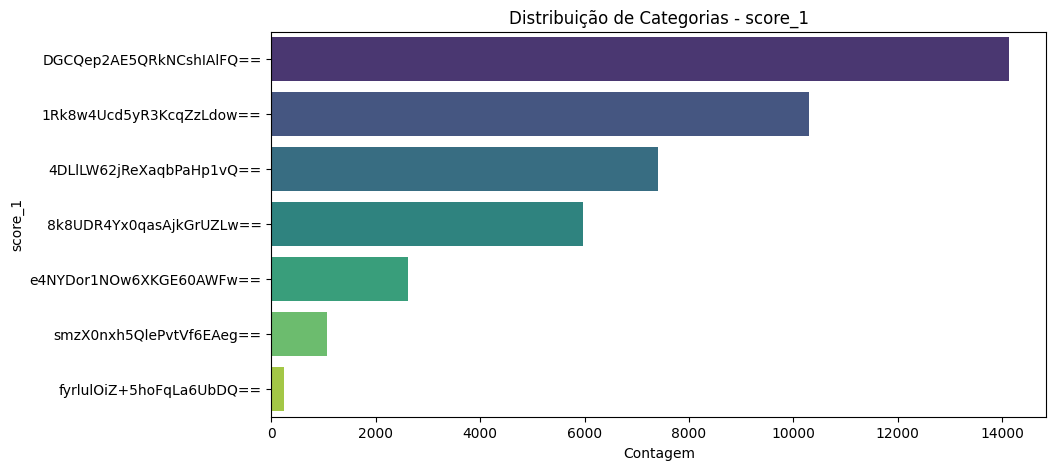

In [76]:
variavel = "score_1"
aplicar_resumo(variavel)


Notamos que há uma diferença aparente entre a frequência observada e a frequência quando restringimos nosso espaço amostral para apenas os clientes inadimplentes. 
Realizamos então um teste qui-quadrado para verificar se essa diferença é estatisticamente significativa. Além disso, calculamos o tamanho do efeito, que indica a 'força' da associação entre as variáveis. 
Removeremos as variáveis que possuírem um tamanho de efeito pequeno **(< 0.1)**, mesmo que apresentem significância estatística.

Com o teste, é perceptível que há uma dependência **(p-valor < 0.05)** entre as variáveis **`score_1`** e **`target_default`**. Dessa forma, manteremos essa variável no nosso modelo.


#### score_2

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,osCzpM4hJrxugqWWuZmMWw==,3466,8.303586,387,5.809938
1,SaamrHMo23l/3TwXOWgVzw==,3205,7.678302,426,6.395436
2,RO7MTL+j4PH2gNzbhNTq/A==,2938,7.038643,290,4.353701
3,/tdlnWjXoZ3OjdtBXzdOJQ==,2505,6.001294,368,5.524696
4,7h+tk4z7O9brtBSe1rNjxA==,2270,5.438298,319,4.789071
5,Fv28Bz0YRTVAT5kl1bAV6g==,2263,5.421528,227,3.407897
6,rJZgTmANW3PjOCQLCcp4iQ==,2250,5.390384,359,5.389581
7,pAzpxkhjPsjWldgSX21+zg==,2048,4.906447,169,2.537157
8,IOVu8au3ISbo6+zmfnYwMg==,1990,4.767495,385,5.779913
9,tQUTfUyeuGkhRotd+6WjVg==,1882,4.508756,131,1.966672


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.0000
Tamanho do Efeito: 0.2247


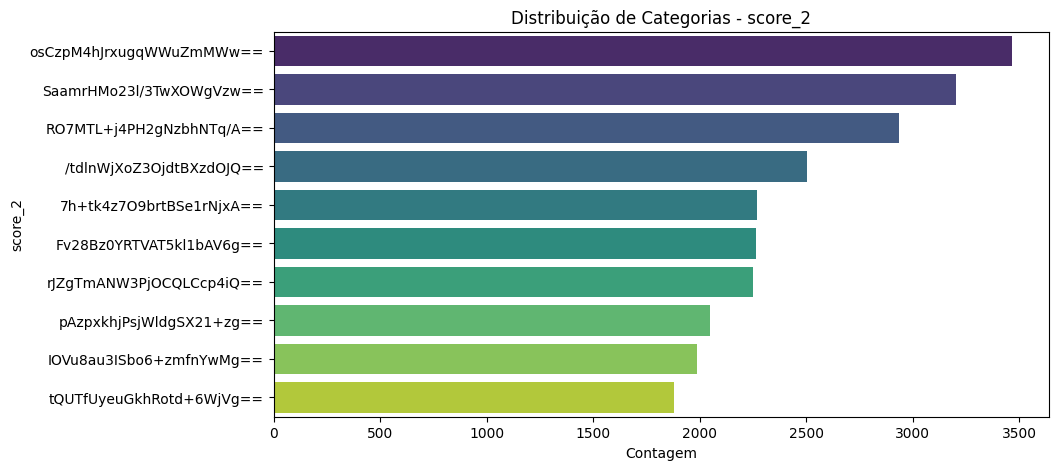

In [77]:
variavel = "score_2"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`score_2`** e **`target_default`**. Dessa forma, manteremos essa variável para o nosso modelo.

#### reason

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,4064,9.737164,714,10.719111
1,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,2856,6.842849,455,6.830806
2,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,1422,3.407049,188,2.822399
3,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,937,2.245010,134,2.011710
4,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,822,1.969476,170,2.552169
5,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,710,1.701128,100,1.501276
6,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,456,1.092556,113,1.696442
7,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,417,0.999113,53,0.795676
8,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,409,0.979946,68,1.020868
9,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,377,0.903275,50,0.750638


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.9929
Tamanho do Efeito: 0.5760


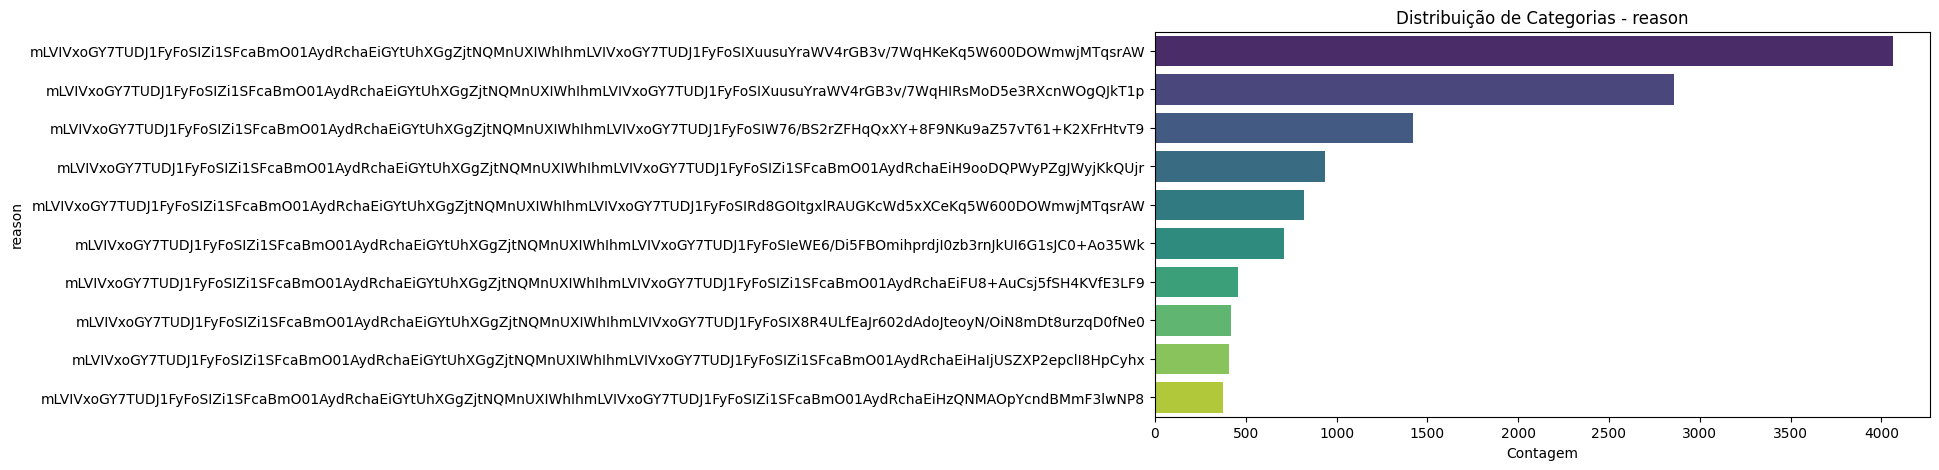

In [78]:
variavel = "reason"
aplicar_resumo(variavel)


Dessa vez, notamos que há uma independência entre as variáveis **`reason`** e **`target_default`**, mesmo que o tamanho do efeito seja considerado alto. Dessa forma, removeremos essa variável do nosso modelo.

#### state

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,xsd3ZdsI3356I3xMxZeiqQ==,7123,17.064756,1092,16.393935
1,BB/zpwTH+8GCIVHlhzOU1Q==,3671,8.794710,629,9.443027
2,sjJbkqJS7cXalHLBFA+EOQ==,3161,7.572890,432,6.485513
3,1DpYl6dtzY0qE33poow3iw==,2888,6.918857,525,7.881699
4,x6Gw/1I8t3KPgT6s82Kodg==,1622,3.885868,284,4.263624
5,kfFcVGcsJmH2n3eYprLkeQ==,1599,3.830766,236,3.543012
6,JrdZzPZEa/YIIGwh8OdTKA==,1433,3.433075,221,3.317820
7,GW2VZ3dN3OGHSjQ6JkfqQw==,1379,3.303706,224,3.362858
8,7bX4XFXmYqoMspxup0CrKA==,1307,3.131214,215,3.227744
9,82aTqSzrTImY+SbAOBQzGQ==,1269,3.040176,208,3.122654


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.0000
Tamanho do Efeito: 0.0547


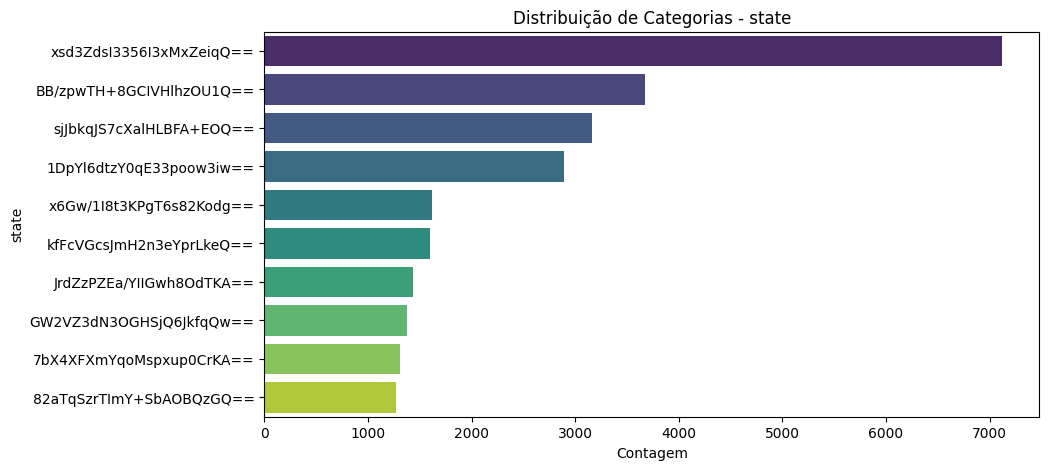

In [79]:
variavel = "state"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`state`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### zip

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,3k2JCQ8Bp5oDwaI39ZJgHA==,538,1.288901,76,1.140970
1,8REhu8TWlarYwZKjbn1BNA==,462,1.106825,76,1.140970
2,iY2cULhh/NFBaiOCRferZQ==,459,1.099638,65,0.975829
3,Kihc6OKBTIHsGwCQy2Vruw==,451,1.080472,66,0.990842
4,LqsmduGRTUSbhLbKf30e8A==,443,1.061307,57,0.855727
5,ceNlmpI8ZLlwn9L3DMcBLQ==,419,1.003809,42,0.630536
6,hKNrx1SIxunqIpoE9PPlow==,396,0.948708,69,1.035880
7,IvtRWE7TLKqrAj9T90HrUg==,389,0.931937,69,1.035880
8,Hfh28TzqkRno6rOU/tjy6Q==,365,0.874440,75,1.125957
9,Ernn+uVXCMq/6ARrBCcd+A==,349,0.836108,43,0.645549


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.0001
Tamanho do Efeito: 0.1530


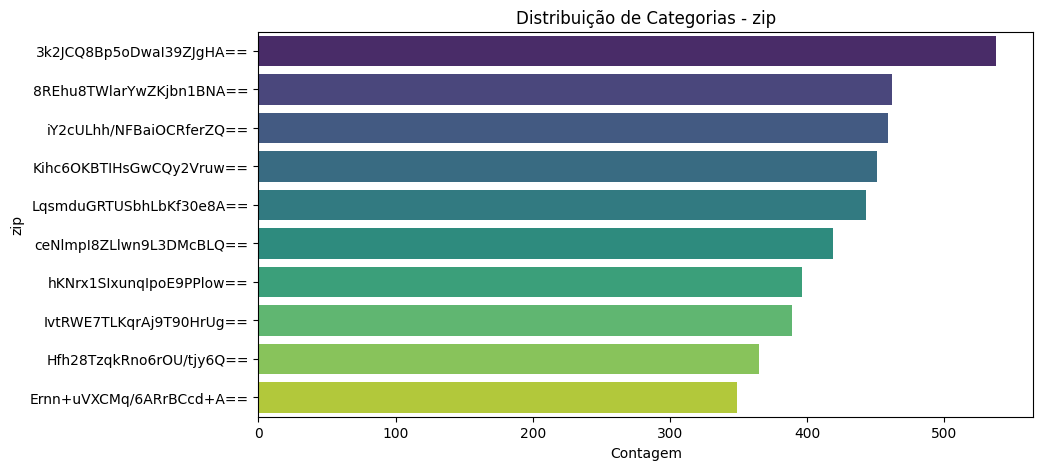

In [80]:
variavel = "zip"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`zip`** e **`target_default`**. Dessa forma, manteremos essa variável para o nosso modelo.

#### channel

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,NCqL3QBx0pscDnx3ixKwXg==,41741,100.0,6661,100.0


Teste Utilizado: Teste Qui-quadrado
p-valor: 1.0000
Tamanho do Efeito: nan


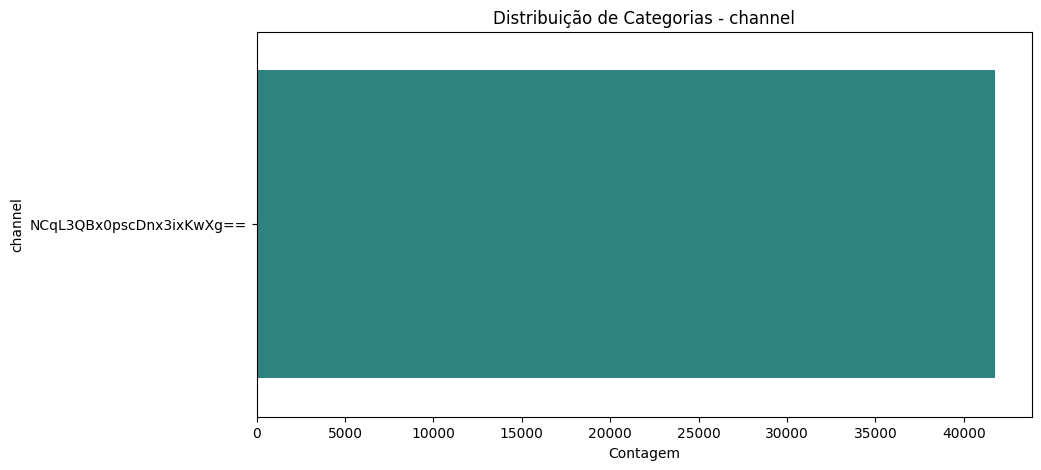

In [81]:
variavel = "channel"
aplicar_resumo(variavel)


A variável **`channel`** é constante, apresentando apenas uma categoria, logo, será removida

#### job_name

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,151,0.385952,16,0.260884
1,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,112,0.286269,17,0.277189
2,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,102,0.260710,19,0.309799
3,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,75,0.191698,11,0.179358
4,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,71,0.181474,10,0.163052
5,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,64,0.163582,10,0.163052
6,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,57,0.145691,11,0.179358
7,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,54,0.138023,7,0.114137
8,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,53,0.135467,12,0.195663
9,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,53,0.135467,11,0.179358


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.0050
Tamanho do Efeito: 0.8928


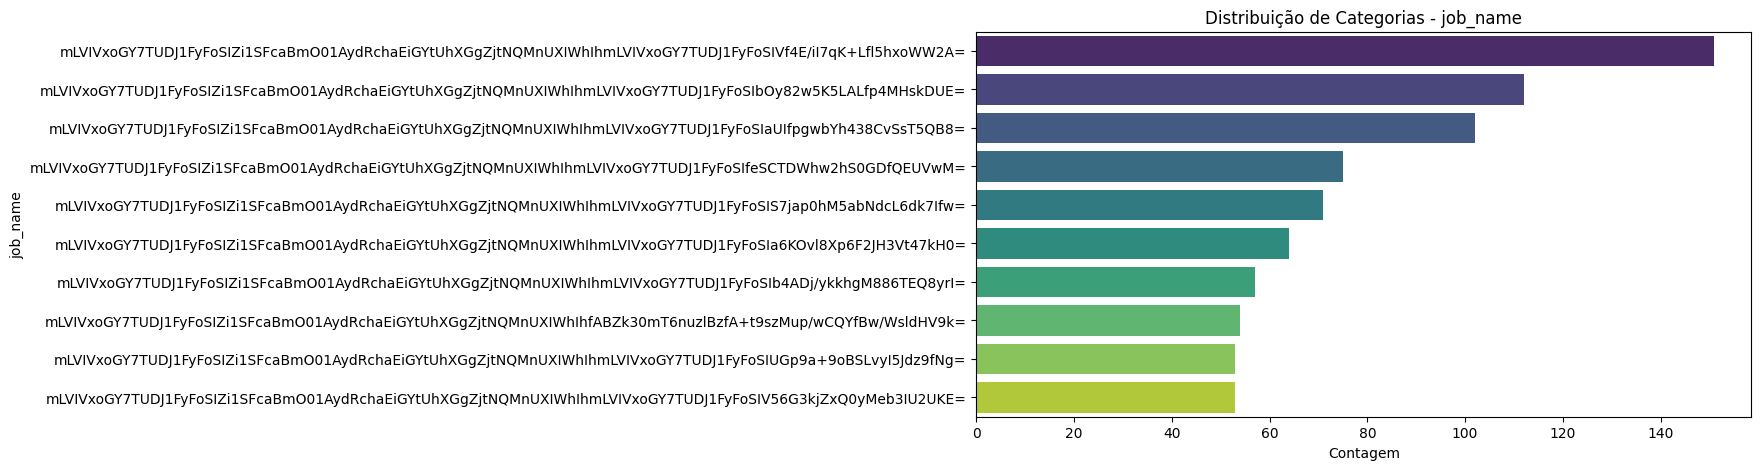

In [82]:
variavel = "job_name"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`job_name`** e **`target_default`**. Dessa forma, manteremos essa variável para o nosso modelo.
É interessante notar que o tamanho do efeito é forte (0.8928). Essa coluna normalmente seria ignorada por se tratar de dados anonimizados, mas possui potencial para a nossa previsão de inadimplência.

#### real_state

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,N5/CE7lSkAfB04hVFFwllw==,20647,49.464555,3054,45.848972
1,n+xK9CfX0bCn77lClTWviw==,17566,42.083323,3042,45.668818
2,nSpvDsIsslUaX6GE6m6eQA==,3480,8.337127,555,8.332082
3,UX7AdFYgQh+VrVC5eIaU9w==,39,0.093433,10,0.150128
4,+qWF9pJpVGtTFn4vFjb/cg==,9,0.021562,0,0.000000


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.0000
Tamanho do Efeito: 0.0345


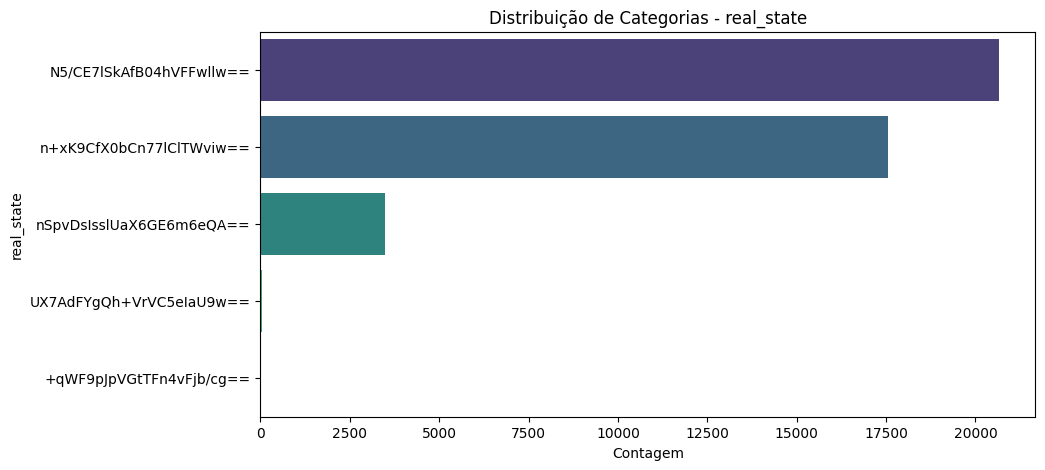

In [83]:
variavel = "real_state"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`real_state`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### email

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,gmail.com,21034,50.391701,3206,48.130911
1,hotmail.com,10502,25.159915,1605,24.095481
2,outlook.com,5419,12.982439,1111,16.679177
3,spgov.com,4782,11.456362,738,11.079418
4,hotmaill.com,3,0.007187,1,0.015013
5,gmaill.com,1,0.002396,0,0.000000


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.0000
Tamanho do Efeito: 0.0482


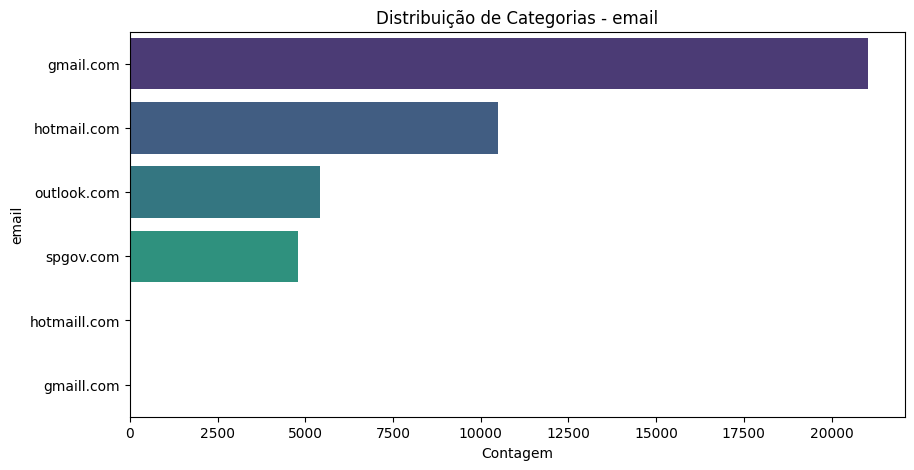

In [84]:
variavel = "email"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`email`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### external_data_provider_first_name

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,cleopatra,6,0.014374,0,0.000000
1,josema,6,0.014374,1,0.015013
2,jose,6,0.014374,2,0.030026
3,adao,6,0.014374,1,0.015013
4,zidonildo,6,0.014374,1,0.015013
5,jordanio,6,0.014374,0,0.000000
6,zirailson,6,0.014374,1,0.015013
7,veralucia,6,0.014374,3,0.045038
8,claudinei,6,0.014374,0,0.000000
9,sinea,5,0.011979,0,0.000000


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.5616
Tamanho do Efeito: 0.8638


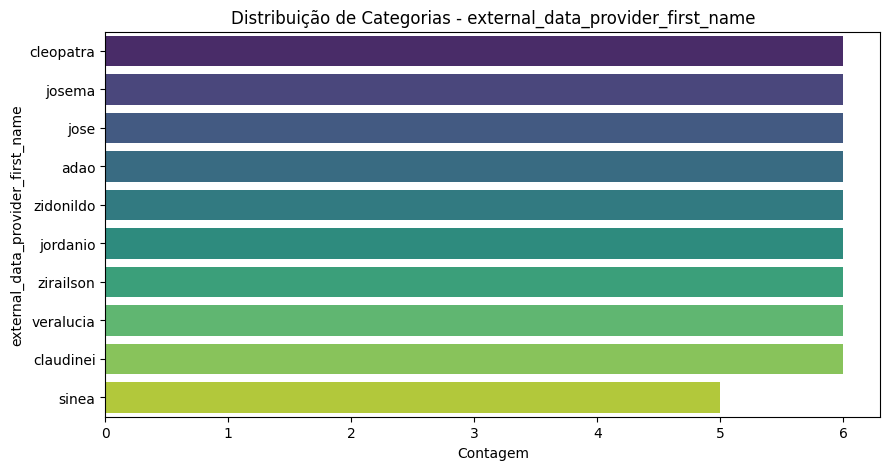

In [85]:
variavel = "external_data_provider_first_name"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma independência entre as variáveis **`external_data_provider_first_name`** e **`target_default`**. É perceptível a alta cardinalidade dessa variável, a qual seria melhor tratada como texto. Assim, ela será removida da análise.

#### marketing_channel

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,Website,10163,26.443421,1892,30.824373
1,Waiting-list,6491,16.889132,1056,17.204301
2,Invite-web,3247,8.448469,546,8.895406
3,Radio-commercial,3145,8.183072,461,7.510590
4,Facebook,3109,8.089402,435,7.086999
5,LinkedIn,3083,8.021752,443,7.217335
6,Instagram,3077,8.006141,444,7.233627
7,Twitter,3070,7.987927,446,7.266210
8,Invite-email,3048,7.930685,415,6.761160


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0502


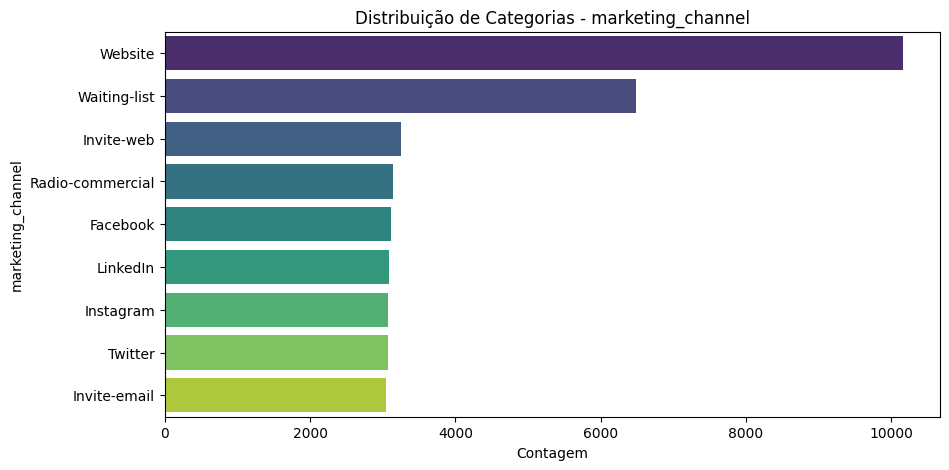

In [86]:
variavel = "marketing_channel"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`marketing_channel`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### shipping_state

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,BR-SP,6495,15.560241,1114,16.724216
1,BR-AM,3742,8.964807,592,8.887554
2,BR-BA,2593,6.212118,361,5.419607
3,BR-GO,2449,5.867133,372,5.584747
4,BR-RR,1497,3.586402,332,4.984237
5,BR-MG,1422,3.406722,325,4.879147
6,BR-SE,1317,3.155171,189,2.837412
7,BR-MA,1301,3.116840,208,3.122654
8,BR-DF,1289,3.088091,212,3.182705
9,BR-TO,1282,3.071321,212,3.182705


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0584


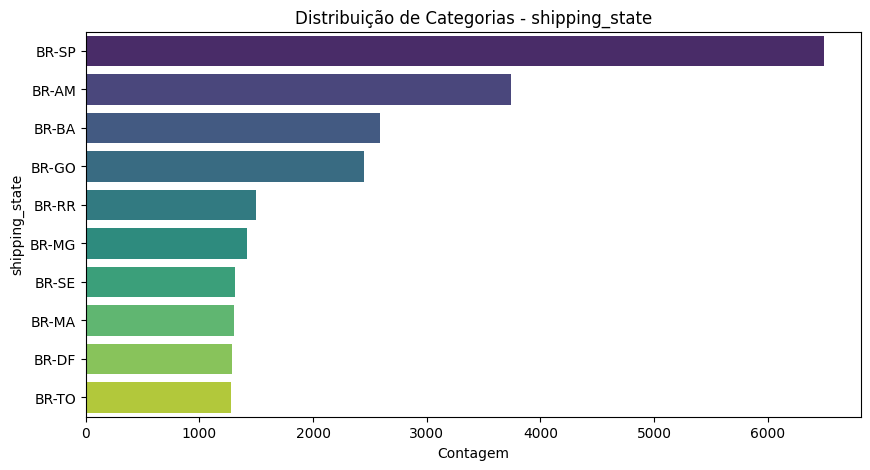

In [87]:
variavel = "shipping_state"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`shipping_state`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### shipping_zip_code

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,28460,7,0.016770,0,0.000000
1,24047,7,0.016770,1,0.015013
2,52411,6,0.014374,2,0.030026
3,17880,6,0.014374,1,0.015013
4,21822,6,0.014374,0,0.000000
5,46534,6,0.014374,1,0.015013
6,31702,6,0.014374,2,0.030026
7,31774,6,0.014374,0,0.000000
8,46306,6,0.014374,1,0.015013
9,32847,6,0.014374,2,0.030026


Teste Utilizado: Qui-quadrado com Correção de Yates
p-valor: 0.7139
Tamanho do Efeito: 0.8022


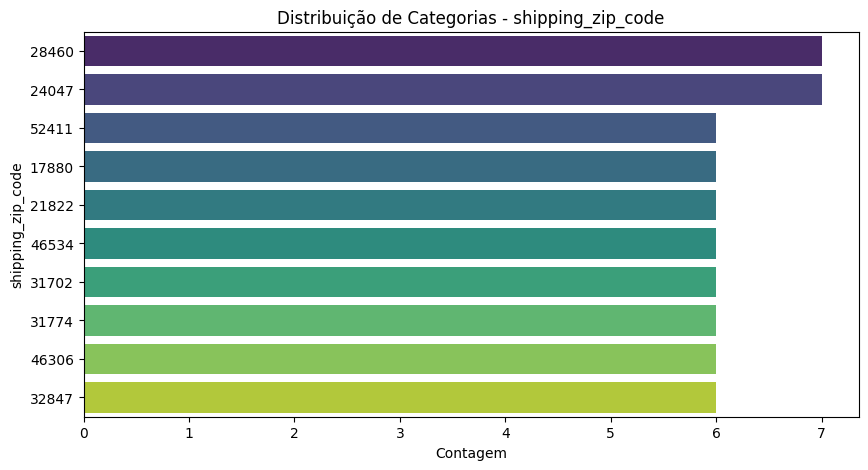

In [88]:
variavel = "shipping_zip_code"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma independência entre as variáveis **`shipping_zip_code`** e **`target_default`**. Assim, ela será removida da análise.

#### target_fraud

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,fraud_friends_family,864,63.66986,732,73.053892
1,fraud_id,493,36.33014,270,26.946108


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.3261


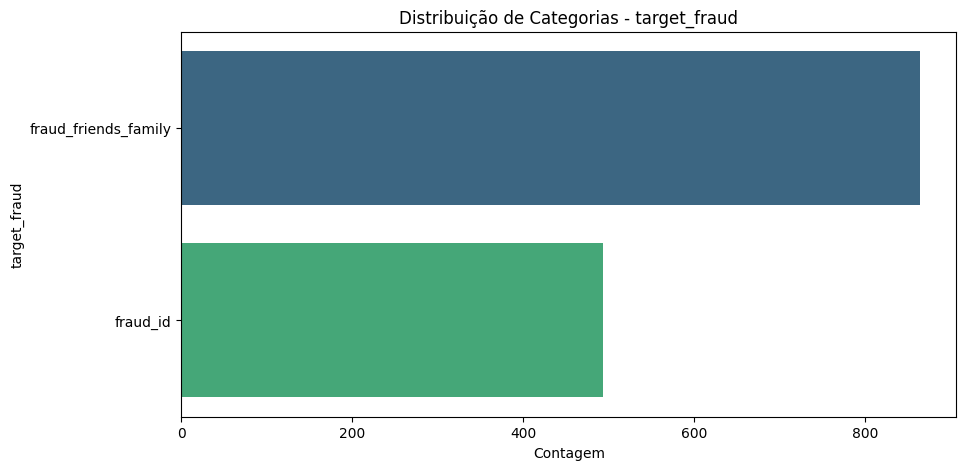

In [89]:
variavel = "target_fraud"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`target_fraud`** e **`target_default`**. Dessa forma, manteremos essa variável para o nosso modelo.
É interessante notar que o tamanho do efeito é forte (0.3261).

#### device_brand

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,Samsung,10315,30.001163,1513,28.601134
1,Apple,10198,29.660869,1391,26.294896
2,Google,1706,4.961899,374,7.069943
3,Amazon,1682,4.892095,353,6.672968
4,Generic_Android_Tablet,1667,4.848467,339,6.408318
5,Sony,1659,4.825199,303,5.727788
6,LG,1659,4.825199,336,6.351607
7,Huawei,1424,4.141702,166,3.137996
8,Generic_Android,1412,4.106800,172,3.251418
9,SonyEricsson,1347,3.917748,170,3.213611


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0828


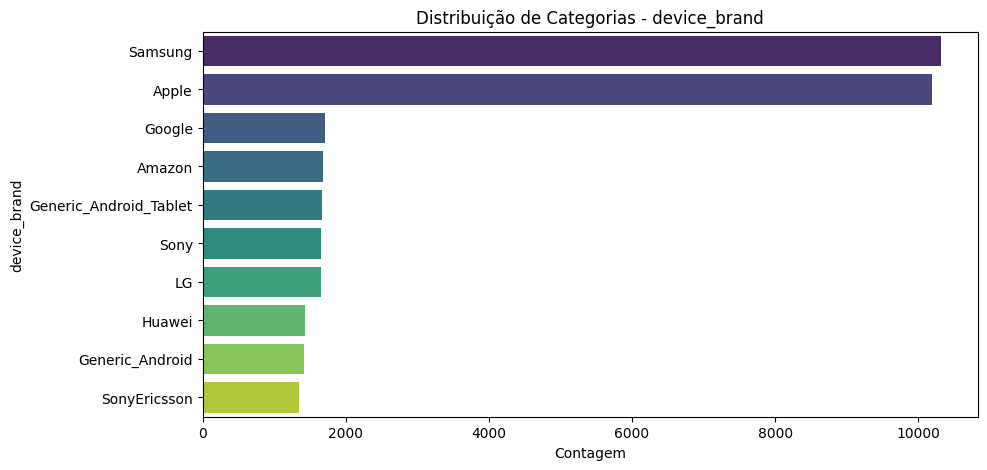

In [91]:
variavel = "device_brand"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`device_brand`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### device_model

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,iPhone,5774,16.793671,756,14.291115
1,Pixel C,1706,4.961899,374,7.069943
2,SM-T827R4,1701,4.947356,368,6.956522
3,"Kindle Fire HDX 7"" WiFi",1682,4.892095,353,6.672968
4,Mac,1675,4.871735,333,6.294896
5,SHIELD Tablet K1,1667,4.848467,339,6.408318
6,SGP771,1659,4.825199,303,5.727788
7,V410,1659,4.825199,336,6.351607
8,SM-T550,1635,4.755395,334,6.313800
9,Nexus 6P,1424,4.141702,166,3.137996


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.1156


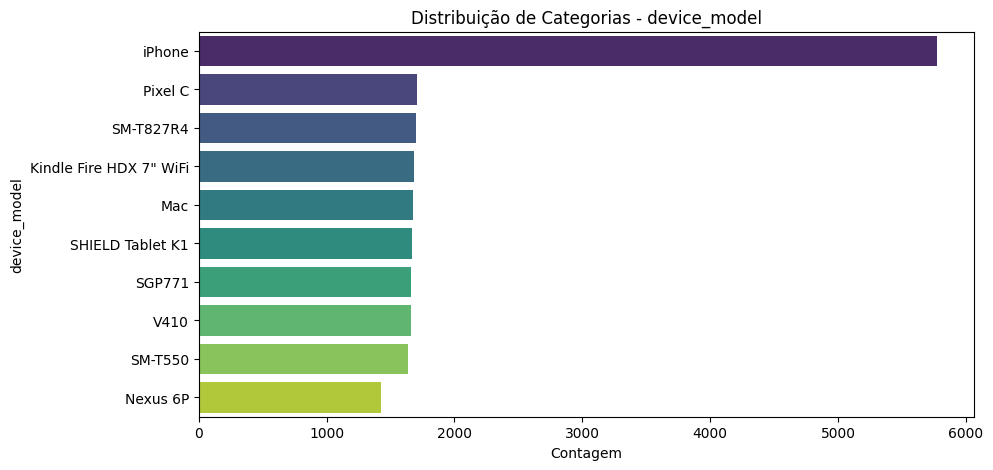

In [92]:
variavel = "device_model"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`device_model`** e **`target_default`**. É interessante notar que a frequência observada para quem é inadimplente é um pouco menor do que a frequência relativa para quem usa iPhone.

#### os_family

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,Android,24184,58.863332,3899,59.147451
1,iOS,8523,20.744797,1058,16.049757
2,Windows,3340,8.129488,660,10.012136
3,Chrome OS,1708,4.157235,318,4.824029
4,Mac OS X,1675,4.076914,333,5.051578
5,Ubuntu,1655,4.028234,324,4.915049


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0624


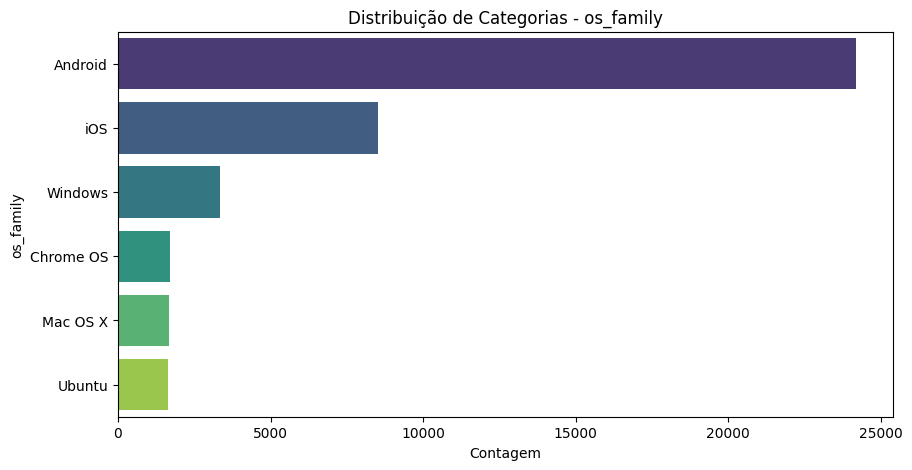

In [93]:
variavel = "os_family"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`os_family`** e **`target_default`**. É interessante notar que a frequência observada para quem é inadimplente é um pouco menor do que a frequência relativa para quem usa o sistema operacional iOS. Contudo, como a variável possui um tamanho de efeito baixo, a removeremos do modelo. 

#### os_version

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,6.0.1,8913,21.694049,1288,19.538835
1,7.0,6174,15.027382,1071,16.246966
2,11.0,4427,10.775222,595,9.026092
3,5.0.2,3294,8.017525,670,10.163835
4,10.0.1,2749,6.691006,302,4.581311
5,8172.45.0,1708,4.157235,318,4.824029
6,7,1697,4.130461,335,5.081917
7,4.4.3,1682,4.093952,353,5.354976
8,10.11.2,1675,4.076914,333,5.051578
9,,1655,4.028234,324,4.915049


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0863


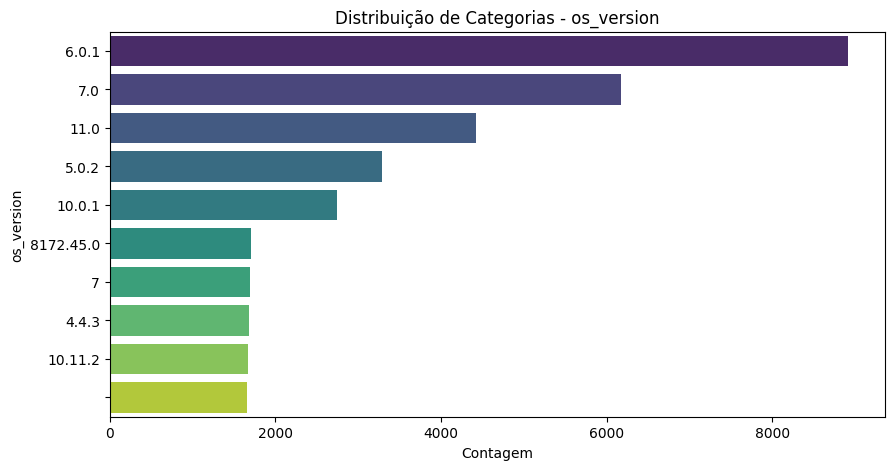

In [94]:
variavel = "os_version"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`os_version`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### user_agent_family

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,Chrome Mobile WebView,13585,33.065596,2174,32.979369
1,Mobile Safari,8523,20.744797,1058,16.049757
2,Chrome Mobile,5581,13.584033,670,10.163835
3,Chrome,5106,12.427893,1021,15.488471
4,Amazon Silk,1682,4.093952,353,5.354976
5,Safari,1675,4.076914,333,5.051578
6,Firefox,1655,4.028234,324,4.915049
7,Edge,1643,3.999026,325,4.930218
8,Samsung Internet,1635,3.979555,334,5.066748


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0875


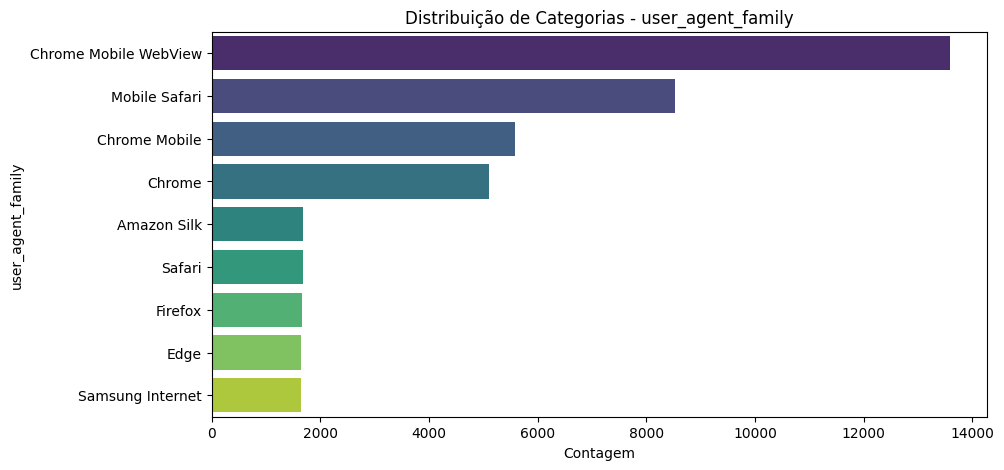

In [95]:
variavel = "user_agent_family"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`user_agent_family`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### browser_version

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,52.0.2743,6126,14.910551,1009,15.306432
1,47.0.2526,4517,10.994280,673,10.209345
2,11.0,4427,10.775222,595,9.026092
3,60.0.3112,3099,7.542899,534,8.100728
4,55.0.2883,3069,7.469880,487,7.387743
5,10.0,2749,6.691006,302,4.581311
6,51.0.2704,1708,4.157235,318,4.824029
7,47.1.79,1682,4.093952,353,5.354976
8,9.0.2,1675,4.076914,333,5.051578
9,34.0.1847,1659,4.037970,336,5.097087


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0862


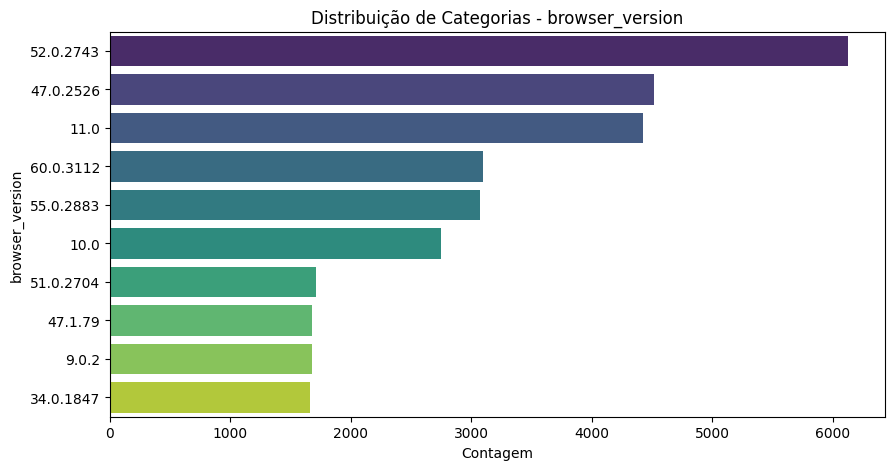

In [96]:
variavel = "browser_version"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`browser_version`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### device_type

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,Mobile,27689,67.394426,3902,59.192961
1,Desktop,8378,20.391871,1635,24.802791
2,Tablet,5018,12.213703,1055,16.004248


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0773


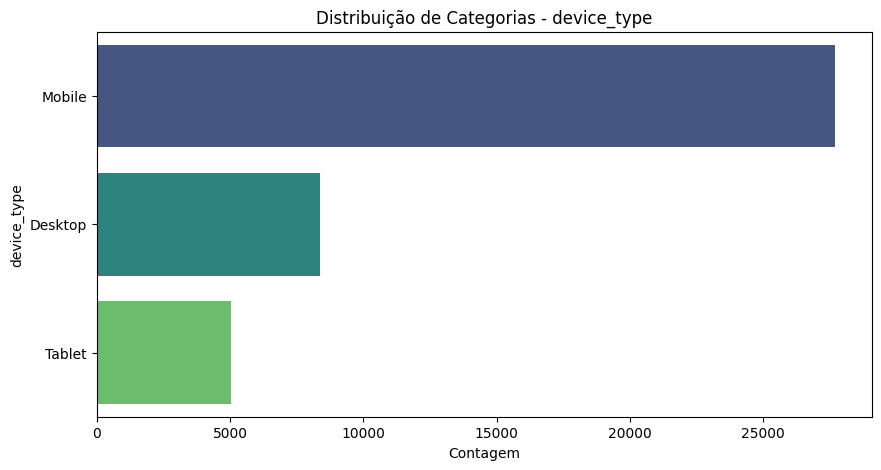

In [97]:
variavel = "device_type"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`device_type`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### is_mobile

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,True,27689,67.394426,3902,59.192961
1,False,13396,32.605574,2690,40.807039


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0764


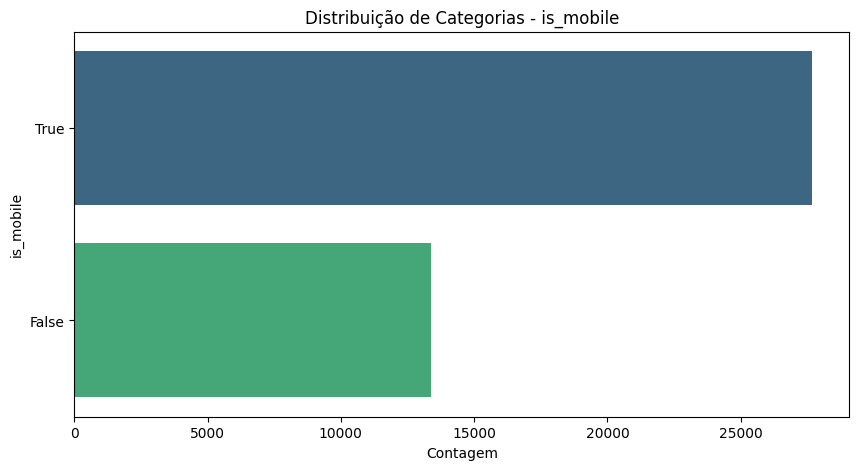

In [98]:
variavel = "is_mobile"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`is_mobile`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### webkit_version

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,537.36,29232,74.136444,4877,77.807913
1,604.1.38,2775,7.037788,279,4.451181
2,602.1.50,2749,6.971849,302,4.818124
3,601.3.9,1675,4.248034,333,5.312699
4,604.1.34,1652,4.189703,316,5.041481
5,420,1347,3.416181,161,2.568602


Teste Utilizado: Teste Qui-quadrado
p-valor: 0.0000
Tamanho do Efeito: 0.0680


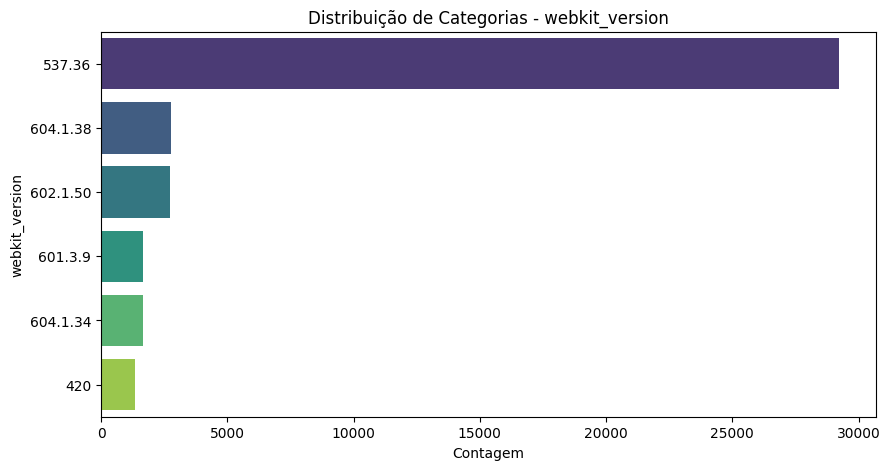

In [99]:
variavel = "webkit_version"
aplicar_resumo(variavel)


Novamente, é perceptível que há uma dependência entre as variáveis **`webkit_version`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### is_webview

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,True,23783,57.887307,3565,54.080704
1,False,17302,42.112693,3027,45.919296


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0336


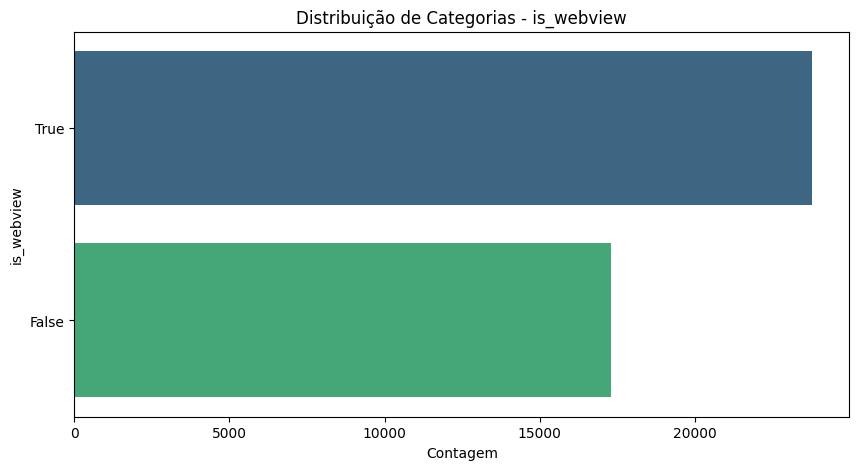

In [100]:
variavel = "is_webview"
aplicar_resumo(variavel)

Novamente, é perceptível que há uma dependência entre as variáveis **`is_webview`** e **`target_default`**. Contudo, como o tamanho do efeito é pequeno, removeremos essa variável para do nosso modelo.

#### facebook_profile

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,False,23653,56.666108,2690,40.384327
1,True,18088,43.333892,3971,59.615673


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.1431


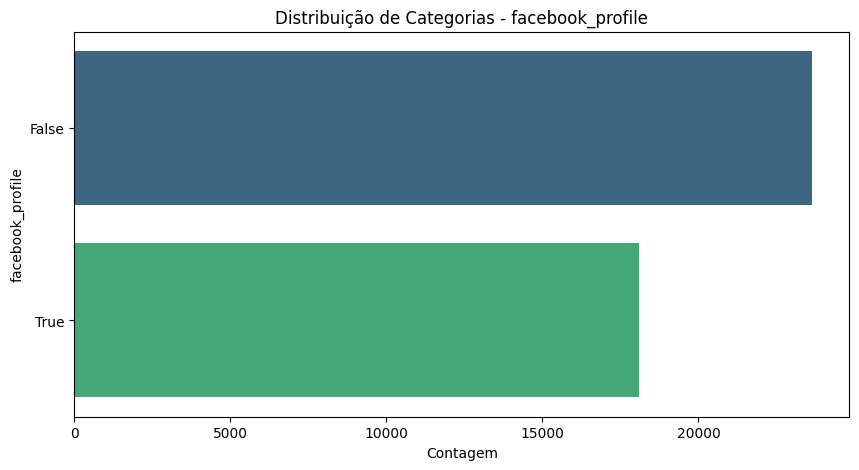

In [108]:
variavel = "facebook_profile"
aplicar_resumo(variavel)

Novamente, é perceptível que há uma dependência entre as variáveis **`facebook_profile`** e **`target_default`**. É interessante notar que a frequência observada para quem é inadimplente é um pouco menor do que a frequência relativa para quem não possui um perfil cadastrado no facebook.

#### tag_a15, tag_b19, tag_da, tag_pro+aty, tag_dfa, tag_aty, tag_nim, tag_c55, tag_n10, tag_n16, tag_outros

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37116,88.919767,5779,86.758745
1,1,4625,11.080233,882,13.241255


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0299


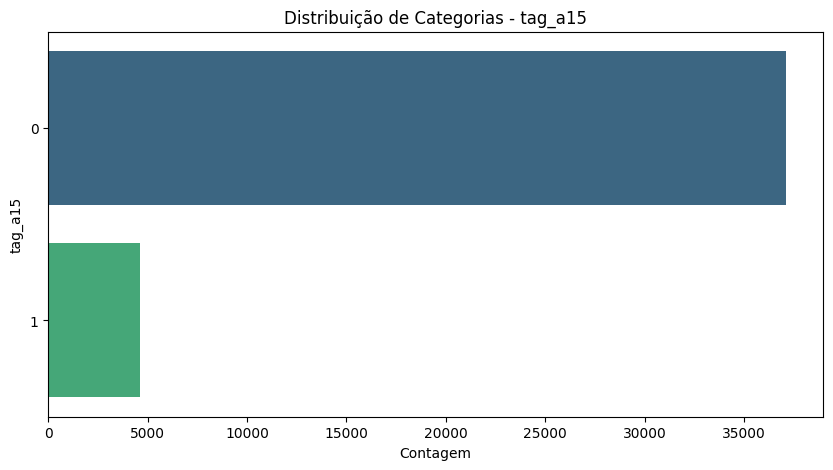

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37199,89.118612,5857,87.92974
1,1,4542,10.881388,804,12.07026


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0008
Tamanho do Efeito: 0.0165


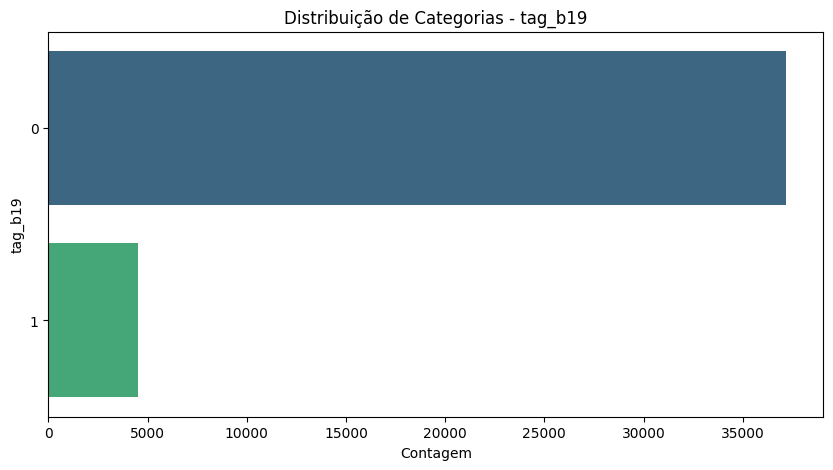

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37271,89.291105,5841,87.689536
1,1,4470,10.708895,820,12.310464


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0225


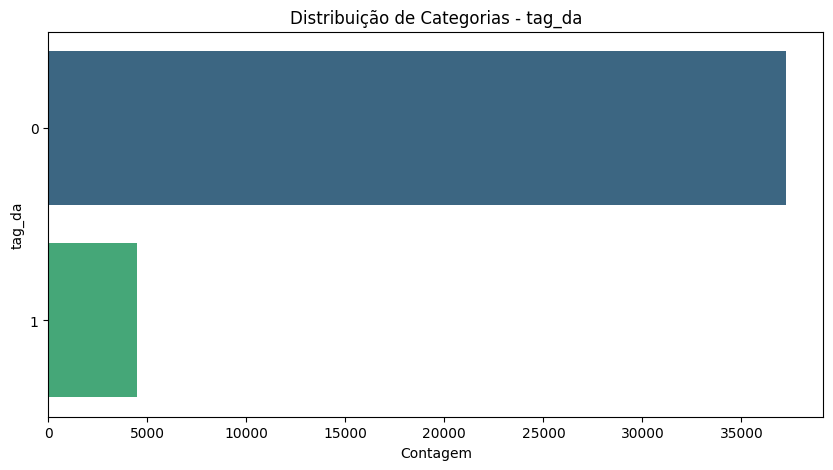

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37195,89.109029,5822,87.404294
1,1,4546,10.890971,839,12.595706


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0237


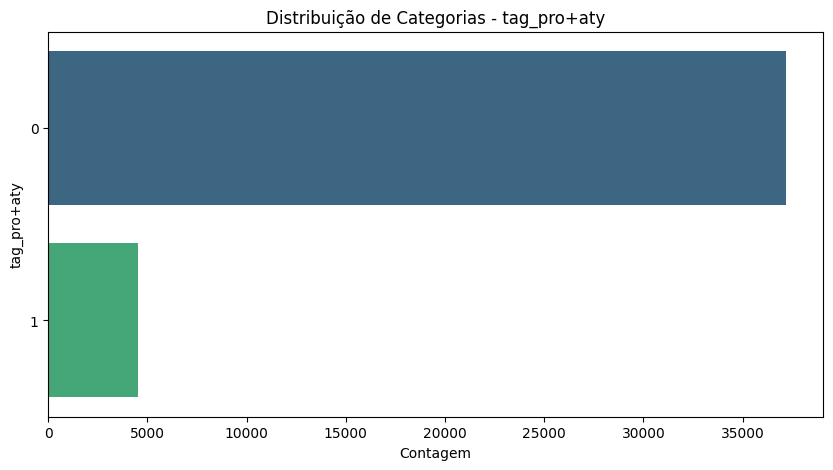

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37259,89.262356,5859,87.959766
1,1,4482,10.737644,802,12.040234


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0002
Tamanho do Efeito: 0.0182


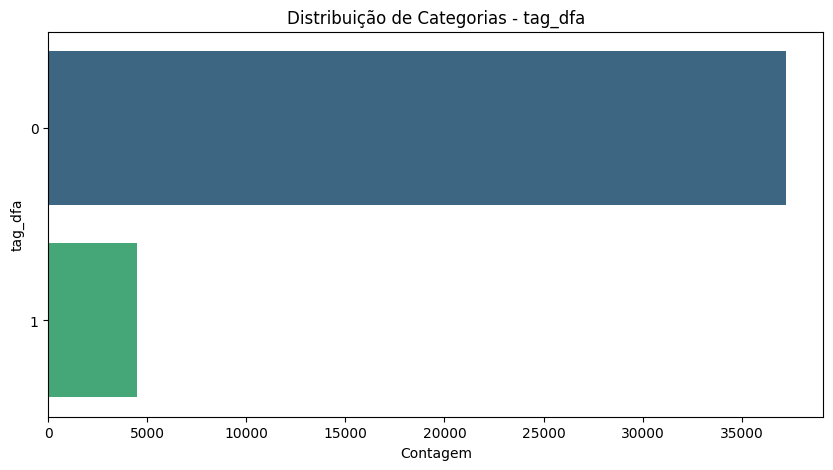

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37242,89.221629,5869,88.109893
1,1,4499,10.778371,792,11.890107


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0016
Tamanho do Efeito: 0.0155


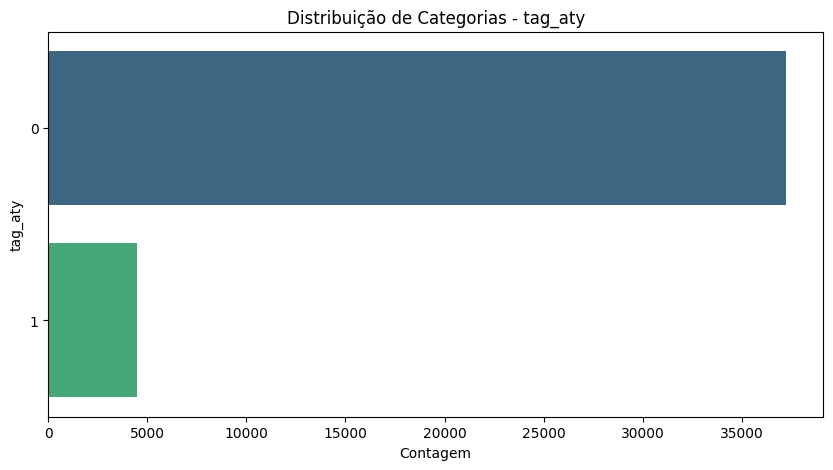

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37240,89.216837,5838,87.644498
1,1,4501,10.783163,823,12.355502


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0220


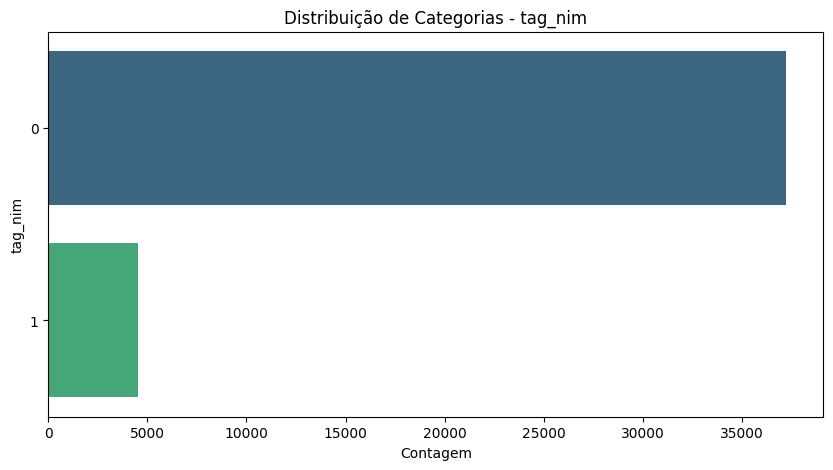

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37215,89.156944,5835,87.59946
1,1,4526,10.843056,826,12.40054


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0217


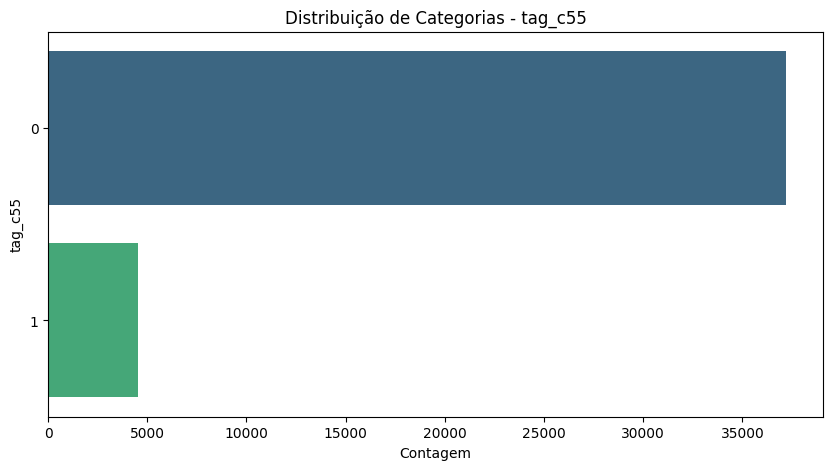

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37405,89.612132,6011,90.241705
1,1,4336,10.387868,650,9.758295


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0690
Tamanho do Efeito: 0.0089


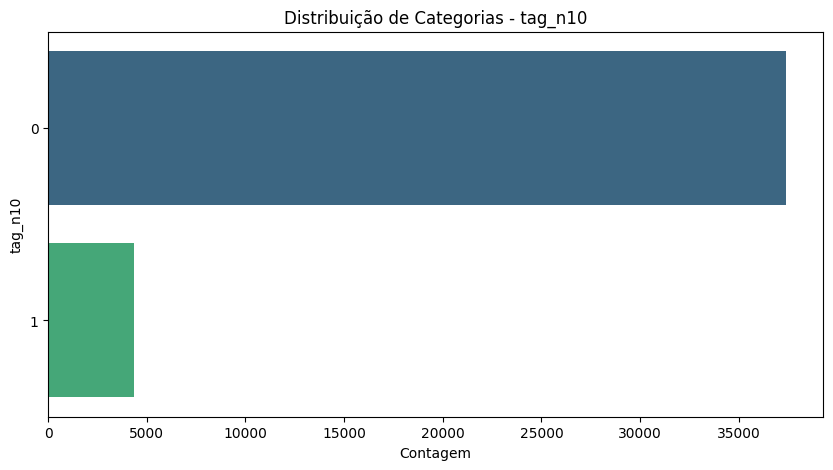

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,0,37430,89.672025,6040,90.677076
1,1,4311,10.327975,621,9.322924


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0032
Tamanho do Efeito: 0.0143


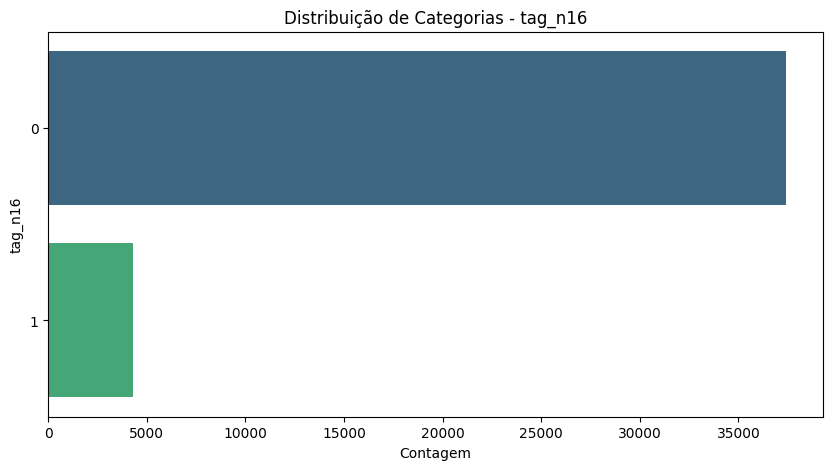

,Categoria,Qtd_Total,Freq_Total(%),Qtd_Default,Freq_Default(%)
0,True,36724,87.980643,5516,82.810389
1,False,5017,12.019357,1145,17.189611


Teste Utilizado: Teste Exato de Fisher
p-valor: 0.0000
Tamanho do Efeito: 0.0692


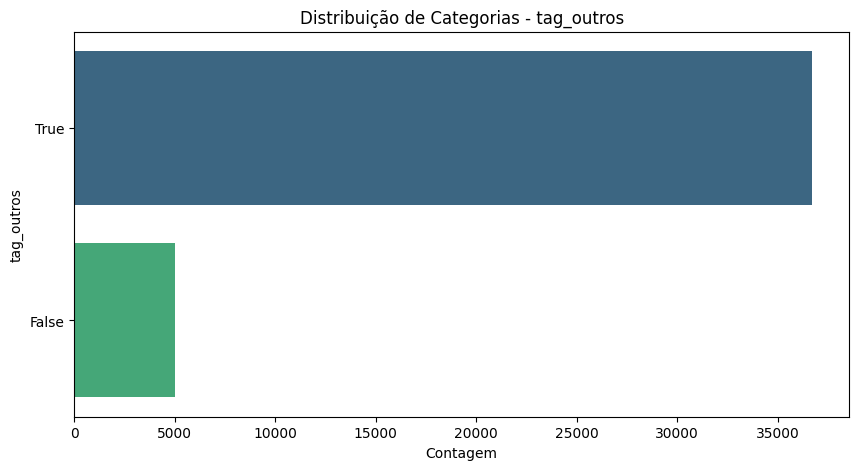

In [107]:
for variavel in ["tag_a15", "tag_b19", "tag_da", "tag_pro+aty", "tag_dfa", "tag_aty", "tag_nim", "tag_c55", "tag_n10", "tag_n16", "tag_outros"]:
    aplicar_resumo(variavel)


Nenhuma das tags apresentou tamanho de efeito maior que 0.1, logo, serão removidas da análise.

Em resumo, apenas as seguintes variáveis categóricas ou binárias permanecerão: **``score_1``**, **``score_2``**, **``zip``**, **``job_name``**, **``target_fraud``**, **``device_model``**, **``facebook_profile``**.